In [45]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

In [46]:
def track_performance(history):
  fig = plt.figure(figsize=(14, 5), dpi=80)
  ax = fig.add_subplot(1, 2, 1)
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  ax.plot(history.history['loss'])
  ax.plot(history.history['val_loss'])
  ax.set_title('Loss')
  ax.set_ylabel('loss')
  ax.set_xlabel('epoch')
  ax.legend(['train', 'val'], loc='upper right')

  ax = fig.add_subplot(1, 2, 2)
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  ax.plot(history.history['accuracy'])
  ax.plot(history.history['val_accuracy'])
  ax.set_title('Accuracy')
  ax.set_ylabel('accuracy')
  ax.set_xlabel('epoch')
  ax.legend(['train', 'val'], loc='lower right')

In [ ]:
from tensorflow.keras.models import load_model


# โหลดโมเดลที่ train ไว้
model = load_model("../Model/resnet50_finetuned.pt")


In [37]:
import numpy as np
from tensorflow.keras.preprocessing import image

# โหลดรูปภาพที่ต้องการทดสอบ
img_path = "..\\Data\\test_images\\200001.jpg"  # เปลี่ยนเป็น path ของรูปที่ต้องการทดสอบ
img = image.load_img(img_path, target_size=(224, 224))  # ปรับขนาดให้ตรงกับ ResNet50

# แปลงรูปเป็นอาร์เรย์และ normalize
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # เพิ่มมิติให้เป็น (1, 224, 224, 3)
img_array = img_array / 255.0  # Normalize (เฉพาะถ้าโมเดลใช้การ Normalize ตอน Train)

In [38]:
predictions = model.predict(img_array)

# แสดงผลลัพธ์
print("Prediction:", predictions)

# หากเป็นปัญหาการจำแนกประเภท (Classification)
predicted_class = np.argmax(predictions, axis=1)[0]
print("Predicted Class:", predicted_class)


1/1 [==============================] - 1s 971ms/step
Prediction: [[0.11358    0.01371172 0.00231843 0.10414986 0.22103797 0.00576641
  0.0636228  0.20510063 0.04282478 0.22788747]]
Predicted Class: 9


In [39]:
import pandas as pd
import os

# กำหนด path ของโฟลเดอร์รูปภาพ
test_dir = "../Data/test_images"

# สร้าง DataFrame ที่มีแค่ path ของภาพ
image_paths = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir) if fname.endswith(".jpg")]
df_test = pd.DataFrame({"filename": image_paths})  # ไม่มี label เพราะไม่มีคลาส

print(df_test.head())  # ตรวจสอบ DataFrame


                         filename
0  ../Data/test_images\200001.jpg
1  ../Data/test_images\200002.jpg
2  ../Data/test_images\200003.jpg
3  ../Data/test_images\200004.jpg
4  ../Data/test_images\200005.jpg


In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col="filename",
    y_col=None,  # ไม่มี label
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # ไม่มีคลาส
    shuffle=False
)


Found 3469 validated image filenames.


In [41]:
predictions = model.predict(test_generator)

import numpy as np
predicted_classes = np.argmax(predictions, axis=1)  # แปลงเป็นคลาสที่โมเดลทำนาย

data_dir = "../Data"  # Change this to your actual path
true_labels = pd.read_csv(os.path.join(data_dir, "train.csv"))
true_labels = true_labels[["label"]]

accuracy = np.mean(predicted_classes == np.array(true_labels))
print(f"Test Accuracy: {accuracy:.4f}")


109/109 [==============================] - 12s 99ms/step
Test Accuracy: 0.0000


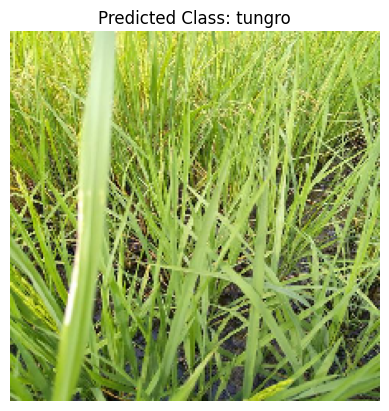

In [ ]:
import matplotlib.pyplot as plt

# โหลดรูป
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')

# แสดงผลลัพธ์
class_labels = {0:'bacterial_leaf_blight', 1:'bacterial_leaf_streak',
 2:'bacterial_panicle_blight', 3:'blast', 4:'brown_spot', 5:'dead_heart',
 6:'downy_mildew', 7:'hispa', 8:'normal', 9:'tungro'}

predicted_class_name = class_labels[predicted_class]
correct_class_name = class_labels[true_labels]

plt.title(f"Predicted Class: {predicted_class_name}")
plt.show()
